## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Preprocessing MR Knee Images](https://sbonaretti.github.io/pyKNEEr/preprocessing.html)

Preprocessing of MR images is fundamental to homogenize spatial information and intensity of images

In the pipeline below:
- Steps 1-3 uniform image orientation, knee laterality, and image origin. The resulting image has the same intensity as the acquired `.dcm` image, but different collocation in space. It is saved as `_orig.mha`
- Steps 4-6 act on the intensities of the image, by correcting the inhomogeneous magnetic field, rescaling to a fixed range, and enhancing the cartilage contours [1]. The resulting image has different intensity than the acquired `.dcm` image, and it is used for atlas-based segmentation. It is saved as `_prep.mha`. These steps are computationally expensive, so if not needed, avoid them by setting `intensity_standardization` to zero (see below) 

---

*Notes for reproducibility of this notebook:*
- The original dicom images can be downloaded from the [OAI website](https://nda.nih.gov/oai). The ID of the used images are [here](https://github.com/sbonaretti/pyKNEEr/blob/master/publication/data/pyKNEEr_data_OAI.ipynb)  
- Location of input and output files in Zenodo and Github is [here](https://github.com/sbonaretti/pyKNEEr/blob/master/publication/data/data_index.ipynb)

- Download input image list file from [GitHub](https://github.com/sbonaretti/pyKNEEr/tree/master/publication/data):

In [ ]:
# download input file from GitHub
import wget
raw_url         = "https://raw.githubusercontent.com/sbonaretti/pyKNEEr/master/publication/data/"
input_file_name = "image_list_preprocessing_OAI1_T2_0.txt"
wget.download(raw_url + input_file_name, "./" + input_file_name)

---

## Import packages

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from pykneer import pykneer_io           as io
from pykneer import preprocessing_for_nb as prep

## Image information

Inputs:   
- `input_file_name` contains the list of the images to be preprocessed 
- `nOfCores` is the number of cores used for computations (computations are parallelized for speed)
- `intensity_standardization` is a flag that determines if the intensity standardization is performed (0=no, 1=yes)

In [3]:
# input_file_name           = "./image_list_preprocessing_OAI1_T2_0.txt" # commented out because downloaded from GitHub
n_of_cores                = 10
intensity_standardization = 1

#### Read image data
- `imageData` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_preprocessing(input_file_name)

YR04_01_T2_0
YR04_02_T2_0
YR04_03_T2_0
YR04_04_T2_0
YR04_05_T2_0
YR04_06_T2_0
YR04_07_T2_0
YR04_08_T2_0
YR04_09_T2_0
YR04_10_T2_0
YR04_11_T2_0
YR04_12_T2_0
YR04_13_T2_0
YR04_14_T2_0
YR04_15_T2_0
YR04_16_T2_0
YR04_17_T2_0
YR04_18_T2_0
YR04_19_T2_0
-> information loaded for 19 subjects


## Spatial standardization

#### Step 0: Read the dicom images

In [5]:
prep.read_dicom_stack(image_data, n_of_cores)

-> YR04_02_T2_0
Size:      384   384   27
Spacing:   0.31 0.31 3.48
Origin:    -20.10 -67.73 64.36
Direction: 
0.12 0.00 -0.99 
0.99 0.00 0.12 
0.00 -1.00 0.00
-> YR04_06_T2_0
Size:      384   384   28
Spacing:   0.31 0.31 3.48
Origin:    -21.48 -49.23 58.55
Direction: 
-0.05 0.00 -1.00 
1.00 -0.00 -0.05 
-0.00 -1.00 0.00
-> YR04_04_T2_0
Size:      384   384   27
Spacing:   0.31 0.31 3.48
Origin:    -21.09 -48.86 46.92
Direction: 
-0.07 0.00 -1.00 
1.00 0.00 -0.07 
0.00 -1.00 -0.00
-> YR04_07_T2_0
Size:      384   384   27
Spacing:   0.31 0.31 3.48
Origin:    -26.86 -55.57 53.70
Direction: 
0.09 0.00 -1.00 
1.00 0.00 0.09 
0.00 -1.00 0.00
-> YR04_09_T2_0
Size:      384   384   32
Spacing:   0.31 0.31 3.48
-> YR04_10_T2_0
Origin:    -14.76 -71.02 52.29
Size:      384   384   33
Direction: 
-0.12 0.00 -0.99 
0.99 0.00 -0.12 
0.00 -1.00 -0.00Spacing:   0.31 0.31 3.48

Origin:    -25.62 -77.23 80.72
Direction: 
0.03 0.00 -1.00 
1.00 0.00 0.03 
0.00 -1.00 0.00
-> YR04_01_T2_0
Size:      384

#####   Save image header
The image header of the first slice of the dicom stack is saved in a `.txt` file. This can be useful to extract information such as subject's date of birth, exam date, etc.

In [6]:
prep.print_dicom_header(image_data, n_of_cores)

-> Dicom headers written
-> The total time was 0.23 seconds (about 0 min)


#### Step 1: Change orientation to RAI 
All images are oriented to the RAI (right, anterior, inferior) orientation

In [7]:
prep.orientation_to_rai(image_data, n_of_cores)

-> Image orientation changed
-> The total time was 10.86 seconds (about 0 min)


#### Step 2: Change laterality if knee is right
Right knees are flipped to left knees to have the same laterality 

In [8]:
prep.flip_rl(image_data, n_of_cores)

-> Image laterality changed for right images
-> The total time was 0.37 seconds (about 0 min)


#### 3. Set image origin to (0,0,0)
All images are set to the origin (0,0,0). Images are saved as *_orig.mha and they are anonymized

In [9]:
prep.origin_to_zero(image_data, n_of_cores)

-> Image origin changed
-> _orig.mha images saved
-> The total time was 0.30 seconds (about 0 min)


#### 4. Correct magnetic field inhomogeneities
Magnetic fields inhomogeneities create grey shades on images. This correction removes these shades. This is the longest step of the processing. It can take up to 15-20 min on a standard PC or laptop

In [10]:
if intensity_standardization == 1:
    prep.field_correction(image_data, n_of_cores) # add "#" in front of the command if intensity standardization is not needed

-> The total time for image YR04_05_T2_0 was 67 seconds (about 1 min)
-> The total time for image YR04_01_T2_0 was 87 seconds (about 1 min)
-> The total time for image YR04_04_T2_0 was 94 seconds (about 1 min)
-> The total time for image YR04_07_T2_0 was 107 seconds (about 1 min)
-> The total time for image YR04_08_T2_0 was 123 seconds (about 2 min)
-> The total time for image YR04_02_T2_0 was 133 seconds (about 2 min)
-> The total time for image YR04_09_T2_0 was 176 seconds (about 2 min)
-> The total time for image YR04_06_T2_0 was 177 seconds (about 2 min)
-> The total time for image YR04_15_T2_0 was 126 seconds (about 2 min)
-> The total time for image YR04_16_T2_0 was 118 seconds (about 1 min)
-> The total time for image YR04_18_T2_0 was 111 seconds (about 1 min)
-> The total time for image YR04_17_T2_0 was 145 seconds (about 2 min)
-> The total time for image YR04_19_T2_0 was 112 seconds (about 1 min)
-> The total time for image YR04_11_T2_0 was 333 seconds (about 5 min)
-> The to

#### 5. Rescale intensities to [0 100]
Intensies are rescaled to the fixed range [0,100] to obtain homogeneous intensity range across images

In [11]:
if intensity_standardization == 1:
    prep.rescale_to_range(image_data, n_of_cores) # add "#" in front of the command if intensity standardization is not needed

-> Image intensities rescaled
-> The total time was 0.62 seconds (about 0 min)


#### 6. Edge preserving smoothing
Cartilage contours are enhanced using a curvature anisotropic diffusion filter

In [12]:
if intensity_standardization == 1:
    prep.edge_preserving_smoothing(image_data, n_of_cores) # add "#" in front of the command if intensity standardization is not needed

-> Image smoothed
-> _prep.mha images saved
-> The total time was 29.97 seconds (about 0 min)


## Visualize original and preprocessed image
Each row corresponds to one image. Left: Original image after spatial preprocessing (steps 1-3). Right: Preprocessed image after intensities correction (steps 4-6). 
Note: A total black rendering of an original image is caused by very large intensity distribution

<Figure size 576x5472 with 0 Axes>

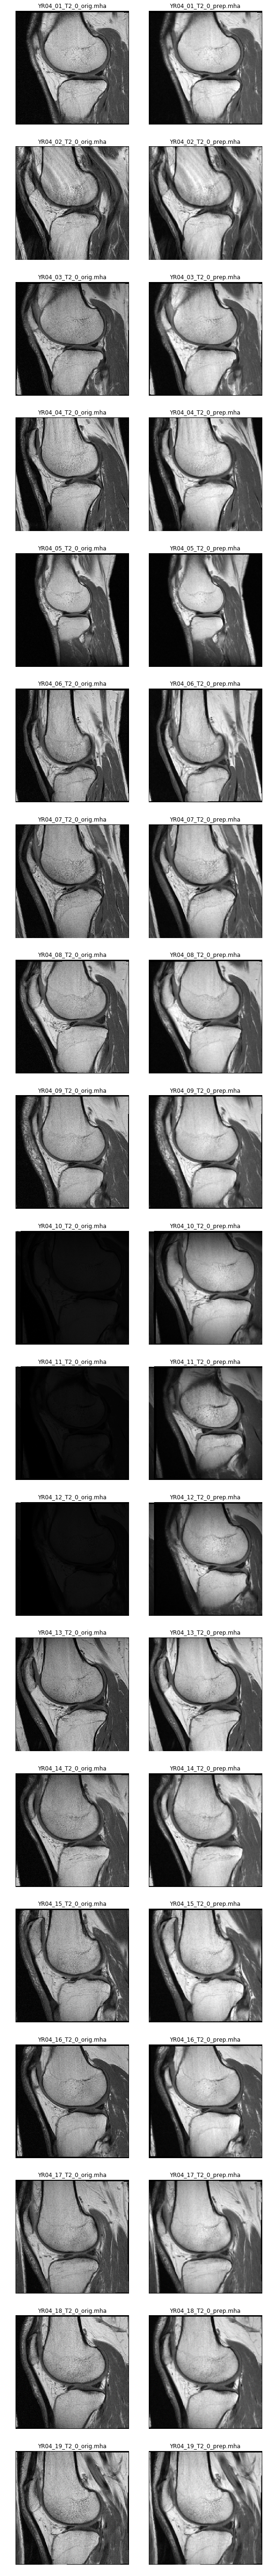

In [13]:
prep.show_preprocessed_images(image_data, intensity_standardization)

### References

[1] Shan L., Zach C., Charles C., Niethammer M. [*Automatic Atlas-Based Three-Label Cartilage Segmentation from MR Knee Images.*](https://www.ncbi.nlm.nih.gov/pubmed/25128683) Med Image Anal. Oct;18(7):1233-46. 2014.

### Dependencies

In [14]:
%load_ext watermark
%watermark -v -m -p SimpleITK,ikt,numpy,matplotlib,multiprocessing

CPython 3.6.1
IPython 6.4.0

SimpleITK unknown
ikt not installed
numpy 1.14.5
matplotlib 2.2.2
multiprocessing unknown

compiler   : GCC 4.8.5 20150623 (Red Hat 4.8.5-11)
system     : Linux
release    : 3.10.0-862.14.4.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 20
interpreter: 64bit
